## Validation, regularisation and callbacks

In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

##### Load the data

In [2]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [3]:
print(diabetes_dataset.keys())

data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
targets = (targets - targets.mean(axis = 0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

### Validation

In [5]:
# Split the dataset

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


##### Train a feedforward neural network model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
  model = Sequential([
                      Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(1)
  ])
  return model

model = get_model()

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
history = model.fit(train_data, train_targets, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [10]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.8823 - mae: 0.6794


[0.8822609186172485, 0.6794365644454956]

##### Plot the learning curves

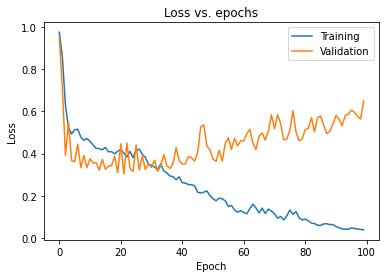

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### Callbacks

In [12]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_train_begin(self, logs=None):
    print("Starting training...")

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch}")

  def on_train_batch_begin(self, batch, logs=None):
    print(f"Training: Starting batch {batch}")

  def on_train_batch_end(self, batch, logs=None):
    print(f"Training: Finished batch {batch}")

  def on_epoch_end(self, epoch, logs=None):
    print(f"Finished epoch {epoch}")

  def on_train_end(self, logs=None):
    print("Finished training!")


In [13]:
model.compile(optimizer="adam", loss="mse")

In [14]:
model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting training...
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 2
Finished training!


In [15]:
class TestingCallback(Callback):
  def on_test_begin(self, logs=None):
    print("Starting testing...")

  def on_test_batch_begin(self, batch, logs=None):
    print(f"Testing: Starting batch {batch}")

  def on_test_batch_end(self, batch, logs=None):
    print(f"Testing: Finished batch {batch}")

  def on_test_end(self, logs=None):
    print("Finished testing!")

In [17]:
model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

Starting testing...
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing!


0.7172497510910034

In [18]:
class PredictionCallback(Callback):
  def on_predict_begin(self, logs=None):
    print("Starting prediction...")

  def on_predict_batch_begin(self, batch, logs=None):
    print(f"Prediction: Starting batch {batch}")

  def on_predict_batch_end(self, batch, logs=None):
    print(f"Prediction: Finished batch {batch}")

  def on_predict_end(self, logs=None):
    print("Finished prediction!")

In [21]:
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished prediction!


array([[-0.6391612 ],
       [ 0.07363026],
       [-0.39517495],
       [-0.7602449 ],
       [ 1.8548616 ],
       [-0.65489113],
       [ 0.16486369],
       [-0.3632503 ],
       [-0.77531093],
       [ 0.03971949],
       [ 0.55565625],
       [-0.5592296 ],
       [ 1.087377  ],
       [-0.43427366],
       [-0.73215497],
       [-0.49378547],
       [-0.2550114 ],
       [ 1.0611094 ],
       [ 0.2635895 ],
       [ 0.7404715 ],
       [-0.24850047],
       [ 0.6626739 ],
       [-0.71552956],
       [ 0.9398585 ],
       [ 1.1976086 ],
       [ 0.9637035 ],
       [ 2.0477803 ],
       [ 0.96112716],
       [ 0.0710183 ],
       [-0.38570622],
       [-0.54110587],
       [ 1.137898  ],
       [ 0.3603753 ],
       [-0.40987065],
       [-0.6965718 ],
       [ 1.1083246 ],
       [ 0.8566029 ],
       [-0.01999716],
       [ 0.49197403],
       [-0.66717094],
       [ 0.63328004],
       [-0.7510191 ],
       [ 0.35915503],
       [ 1.7290767 ],
       [ 0.7649437 ]], dtype=flo